# 基于 *Python Matplotlib* 的 2维距离热图

## 0 加载数据包

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 1 文件读写

In [2]:
Pikco = np.loadtxt("PIK_C4_O5_dist_6X.txt")
Pikno = np.loadtxt("PIK_NE2_O5_dist_6X.txt")
Tmcco = np.loadtxt("TMC_C4_O5_dist_6X.txt")
Tmcno = np.loadtxt("TMC_NE2_O5_dist_6X.txt")

## 2 简单散点图验证

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax1.plot(Pikco[:,1],Pikno[:,1], 'o')
ax2.plot(Tmcco[:,1],Tmcno[:,1], 'o')
#ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

## 3 热图

### 3.1 热图的初步实现

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)

def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)


ax1.hexbin(Pikco[:,1], Pikno[:,1], bins='log', cmap=colormap())
ax2.hexbin(Tmcco[:,1], Tmcno[:,1], bins='log', cmap=colormap())
plt.show()

### 3.2 热图细节调整

In [ ]:
fig,axs = plt.subplots(ncols=2,figsize=(21,9))

def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)

ax = axs[0]
hb = ax.hexbin(Pikco[:,1], Pikno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))

ax = axs[1]
hb = ax.hexbin(Tmcco[:,1], Tmcno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))
cb = fig.colorbar(hb,ax=ax)
cb.set_label('log10(Count)')

plt.show()

## 4 直方图

### 4.1 直方图初步实现

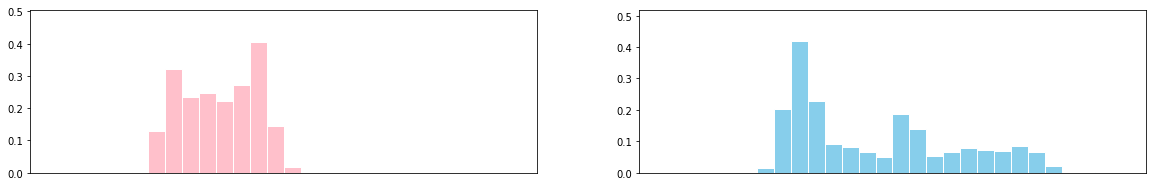

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as path
import matplotlib.patches as patches

fig, axs = plt.subplots(ncols=2,figsize=(20,3))


ax = axs[0]
n, bins = np.histogram(Pikco[:,1], 30,(0,15),density=True)
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T
barpath = path.Path.make_compound_path_from_polys(XY)
patch = patches.PathPatch(barpath,ec='white',fc='pink')
ax.add_patch(patch)
ax.set_xlim(0, 15)
ax.set_ylim(bottom.min(), top.max()+0.1)
ax.set_xticks([])

ax = axs[1]
n, bins = np.histogram(Tmcco[:,1], 30,(0,15),density=True)
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T
barpath = path.Path.make_compound_path_from_polys(XY)
patch = patches.PathPatch(barpath,ec='white',fc='skyblue')
ax.add_patch(patch)
ax.set_xlim(0, 15)
ax.set_ylim(bottom.min(), top.max()+0.1)
ax.set_xticks([])

plt.show()

## 5 整合函数化

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Pikco = np.loadtxt("PIK_C4_O5_dist_6X.txt")
Pikno = np.loadtxt("PIK_NE2_O5_dist_6X.txt")
Tmcco = np.loadtxt("TMC_C4_O5_dist_6X.txt")
Tmcno = np.loadtxt("TMC_NE2_O5_dist_6X.txt")

fig,axs = plt.subplots(ncols=2,figsize=(20,10))

def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)

ax = axs[0]
hb = ax.hexbin(Pikco[:,1], Pikno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))

ax = axs[1]
hb = ax.hexbin(Tmcco[:,1], Tmcno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))
#cb = fig.colorbar(hb,ax=ax)
#cb.set_label('log10(Count)')

plt.show()

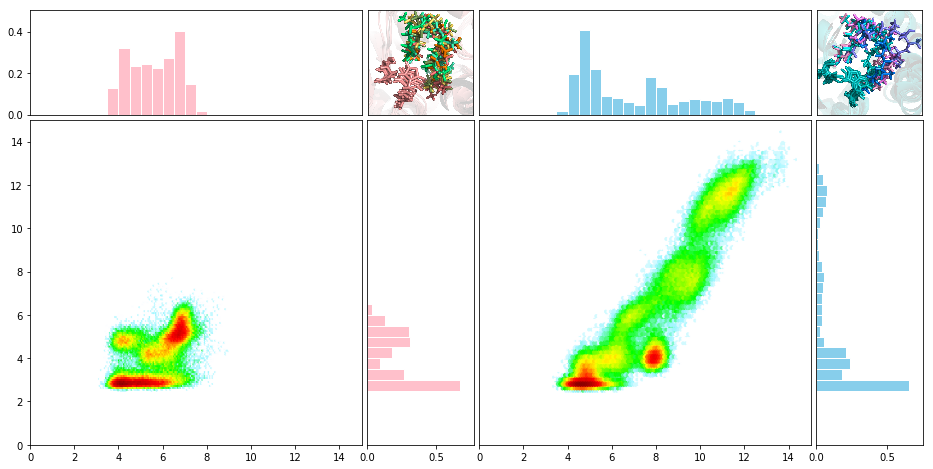

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as path
import matplotlib.patches as patches
import matplotlib.image as mpimg

def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)


fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(4, 8, (1,3))
n, bins = np.histogram(Pikco[:,1], 30,(0,15),density=True)
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T
barpath = path.Path.make_compound_path_from_polys(XY)
patch = patches.PathPatch(barpath,ec='white',fc='pink')
ax.add_patch(patch)
ax.set_xlim(0, 15)
ax.set_ylim(bottom.min(), top.max()+0.1)
ax.set_xticks([])

ax = fig.add_subplot(4, 8, (5,7))
n, bins = np.histogram(Tmcco[:,1], 30,(0,15),density=True)
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T
barpath = path.Path.make_compound_path_from_polys(XY)
patch = patches.PathPatch(barpath,ec='white',fc='skyblue')
ax.add_patch(patch)
ax.set_xlim(0, 15)
ax.set_ylim(bottom.min(), top.max()+0.1)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(4, 8, (12,28))
n, bins = np.histogram(Pikno[:,1], 30,(0,15),density=True)
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
XY = np.array([[bottom, bottom, top, top], [left, right, right, left]]).T
barpath = path.Path.make_compound_path_from_polys(XY)
patch = patches.PathPatch(barpath,ec='white',fc='pink')
ax.add_patch(patch)
ax.set_xlim(bottom.min(), top.max()+0.1)
ax.set_ylim(0,15)
ax.set_yticks([])

ax = fig.add_subplot(4, 8, (16,32))
n, bins = np.histogram(Tmcno[:,1], 30,(0,15),density=True)
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
XY = np.array([[bottom, bottom, top, top], [left, right, right, left]]).T
barpath = path.Path.make_compound_path_from_polys(XY)
patch = patches.PathPatch(barpath,ec='white',fc='skyblue')
ax.add_patch(patch)
ax.set_xlim(bottom.min(), top.max()+0.1)
ax.set_ylim(0,15)
ax.set_yticks([])

ax = fig.add_subplot(4, 8, (9,27))
hb = ax.hexbin(Pikco[:,1], Pikno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))

ax = fig.add_subplot(4, 8, (13,31))
hb = ax.hexbin(Tmcco[:,1], Tmcno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))
ax.set_yticks([])

ax = fig.add_subplot(4, 8, 4)
ax.imshow(mpimg.imread('img1.png'))
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(4, 8, 8)
ax.imshow(mpimg.imread('img2.png'))
ax.set_xticks([])
ax.set_yticks([])

plt.subplots_adjust(wspace=.05, hspace=.05)

#plt.show()
plt.savefig("examples.png")